In [198]:
from collections import defaultdict
from datetime import datetime, date, time, timedelta
import json
import warnings

import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import pandas as pd
import geopandas as gpd
import seaborn as sns

sns.set_theme()
plt.style.use('Solarize_Light2')

In [2]:
# ALL_IDS = all non-OP identifications on these obs made for 'Coccinellidae' or below

ALL_IDS = pd.read_csv('identifications-coccinellidae.csv', index_col=0)
ALL_IDS.insert(3, 'datetime', pd.to_datetime(ALL_IDS['date']))

standard_times = ALL_IDS['datetime'].apply(lambda x: (x - x.utcoffset()).replace(tzinfo=None))
ALL_IDS['datetime'] = standard_times
ALL_IDS['date'] = standard_times.apply(lambda x: x.date())
ALL_IDS.insert(5, 'time', standard_times.apply(lambda x: x.time()))

ALL_IDS.sort_values(by='date', inplace=True)
ALL_IDS

,observation,identifier,username,datetime,date,time,taxon_id,taxon,rank,rank_level,previous_taxon_id,current,disagreement,category,vision,hidden
7,5607,357,annetanne,2010-02-19 09:26:16,2010-02-19,09:26:16,51702,Coccinella septempunctata,species,10,NaN,True,NaN,improving,False,False
10,5783,308,triplep220,2010-02-28 08:37:33,2010-02-28,08:37:33,48486,Coccinellidae,family,30,NaN,True,NaN,supporting,False,False
18,12381,477,loarie,2011-03-07 07:24:46,2011-03-07,07:24:46,48486,Coccinellidae,family,30,NaN,True,NaN,improving,False,False
36,18741,642,biosam,2011-05-29 18:29:36,2011-05-29,18:29:36,48486,Coccinellidae,family,30,NaN,True,NaN,improving,False,False
33,18740,642,biosam,2011-05-29 18:14:10,2011-05-29,18:14:10,48486,Coccinellidae,family,30,NaN,True,NaN,improving,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210972,49354068,1485790,cpu,2022-11-25 21:41:37,2022-11-25,21:41:37,68761,Chilocorus,genus,20,48486.0,True,False,leading,False,False
20914,4113032,1485790,cpu,2022-11-25 18:15:37,2022-11-25,18:15:37,354547,Chilocorinae,subfamily,27,48486.0,True,False,leading,False,False
21169,4159430,6971,silversea_starsong,2022-11-25 00:55:52,2022-11-25,00:55:52,272002,Rhyzobius lophanthae,species,10,354096.0,True,True,leading,False,False
18060,3650575,1485790,cpu,2022-11-25 18:14:50,2022-11-25,18:14:50,48484,Harmonia axyridis,species,10,48486.0,True,False,leading,False,False


In [150]:
# USER_TOTALS = counts and taxon rank proportions ('stats.csv')
# TOP_50_USERS = slice of ALL_IDS (just IDs by the top 50 users in USER_TOTALS)


USER_TOTALS = pd.read_csv('stats.csv', index_col='identifier')
USER_TOTALS

TOP_50_USERS = ALL_IDS[ALL_IDS['identifier'].isin(USER_TOTALS.index[:50])]
TOP_50_USERS['identifier_rank'] = TOP_50_USERS.loc[:, 'identifier'].apply(lambda x: USER_TOTALS.index.get_loc(x)+1)
TOP_50_USERS.sort_values(by='identifier_rank', inplace=True)
# TOP_50_USERS.sort_values(by='identifier', key=lambda col: USER_TOTALS.index.get_loc(col), inplace=True)

print(f"{len(ALL_IDS)} total IDs")
print(f"{len(TOP_50_USERS)} IDs by top 50 identifiers ({int(len(TOP_50_USERS)/len(ALL_IDS)*100)}%)")
TOP_50_USERS

421059 total IDs
283917 IDs by top 50 identifiers (67%)


/var/folders/_x/5fkf1yms3fsdb80jbm4gqr1r0000gq/T/ipykernel_10845/244958541.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TOP_50_USERS['identifier_rank'] = TOP_50_USERS.loc[:, 'identifier'].apply(lambda x: USER_TOTALS.index.get_loc(x)+1)
/var/folders/_x/5fkf1yms3fsdb80jbm4gqr1r0000gq/T/ipykernel_10845/244958541.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TOP_50_USERS.sort_values(by='identifier_rank', inplace=True)


,observation,identifier,username,datetime,date,time,taxon_id,taxon,rank,rank_level,previous_taxon_id,current,disagreement,category,vision,hidden,identifier_rank
187756,43858332,463097,richyfourtytwo,2020-04-27 11:09:51,2020-04-27,11:09:51,48987,Hippodamia convergens,species,10,48987.0,True,False,supporting,False,False,1
142785,31741214,463097,richyfourtytwo,2020-03-31 20:14:40,2020-03-31,20:14:40,48484,Harmonia axyridis,species,10,333796.0,True,False,improving,False,False,1
379722,95054856,463097,richyfourtytwo,2021-09-16 21:12:41,2021-09-16,21:12:41,48484,Harmonia axyridis,species,10,154559.0,True,True,improving,False,False,1
142780,31741130,463097,richyfourtytwo,2020-03-31 20:14:48,2020-03-31,20:14:48,48484,Harmonia axyridis,species,10,48486.0,True,False,improving,False,False,1
142976,31804902,463097,richyfourtytwo,2020-03-31 11:28:10,2020-03-31,11:28:10,143034,Hippodamia variegata,species,10,48988.0,True,False,improving,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187914,43929512,2000059,buzzman,2020-04-27 18:11:41,2020-04-27,18:11:41,48484,Harmonia axyridis,species,10,333796.0,True,False,improving,True,False,50
144356,32219140,2000059,buzzman,2019-09-10 21:16:28,2019-09-10,21:16:28,48988,Hippodamia,genus,20,48988.0,True,False,supporting,False,False,50
169545,39163220,2000059,buzzman,2020-02-24 17:32:06,2020-02-24,17:32:06,48484,Harmonia axyridis,species,10,154560.0,True,True,improving,False,False,50
187937,43934704,2000059,buzzman,2020-04-27 18:05:41,2020-04-27,18:05:41,51702,Coccinella septempunctata,species,10,51703.0,True,False,improving,True,False,50


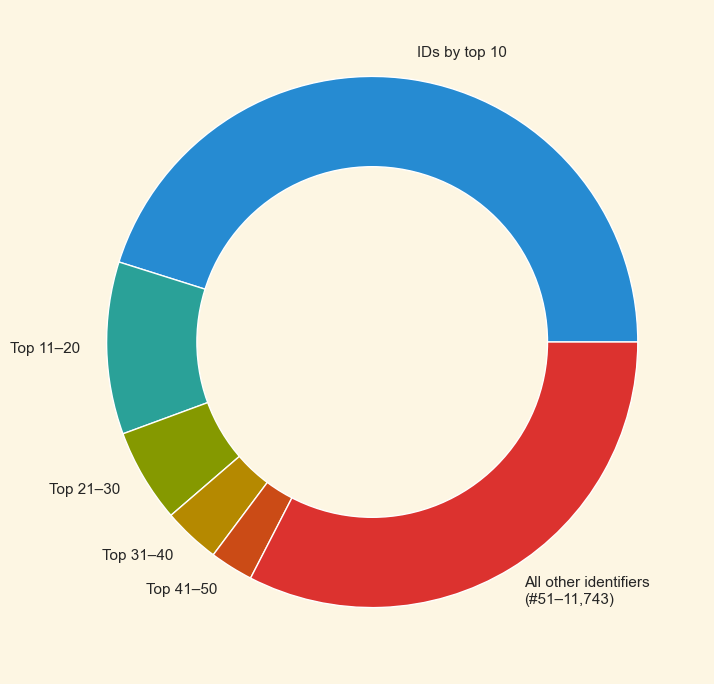

In [334]:
# ACTIVITY_GROUPS = pd.DataFrame({'Top 10': len(ALL_IDS[ALL_IDS['identifier_rank'] <= 10]), 
#                                 'Top 11-20': len(ALL_IDS[ALL_IDS['identifier_rank'] <= 20]), 
#                                  'Top 21-30': len(ALL_IDS[ALL_IDS['identifier_rank'] <= 30]), 
#                                   'Top 31-40': len(ALL_IDS[ALL_IDS['identifier_rank'] <= 40]), 
#                                    'Top 41-50': len(ALL_IDS[ALL_IDS['identifier_rank'] <= 50]), 
#                                     'Rest of identifiers': len(ALL_IDS[ALL_IDS['identifier_rank'] > 50])}, index=['total IDs'])
# ACTIVITY_GROUPS

fig, ax = plt.subplots()
ax.pie(x=[len(ALL_IDS[ALL_IDS['identifier_rank'] <= 10]),
              len(ALL_IDS[(ALL_IDS['identifier_rank'] <= 20) & (ALL_IDS['identifier_rank'] > 10)]),
              len(ALL_IDS[(ALL_IDS['identifier_rank'] <= 30) & (ALL_IDS['identifier_rank'] > 20)]),
              len(ALL_IDS[(ALL_IDS['identifier_rank'] <= 40) & (ALL_IDS['identifier_rank'] > 30)]),
              len(ALL_IDS[(ALL_IDS['identifier_rank'] <= 50) & (ALL_IDS['identifier_rank'] > 40)]),
              len(ALL_IDS[ALL_IDS['identifier_rank'] > 50])],
        labels=['IDs by top 10', 'Top 11–20', 'Top 21–30', 'Top 31–40', 'Top 41–50', f'All other identifiers\n(#51–11,743)'])

center = plt.Circle((0,0),0.66,fc='#fdf6e3')
fig = plt.gcf()
fig.gca().add_artist(center)
# ax.text(0.5, 0.5, 'A majority of coccinellid\nidentifications are by the\ntop 50 identifiers', transform = ax.transAxes, va = 'center', ha = 'center')
fig.tight_layout()
fig.savefig('idpie')

In [152]:
PROPS_CATEGORY = TOP_50_USERS.groupby(['identifier', 'category'], dropna=False).observation.count()
PROPS_RANK = TOP_50_USERS.groupby(['identifier', 'rank'], dropna=False).observation.count()
PROPS_DISAGREE = TOP_50_USERS.groupby(['identifier', 'disagreement'], dropna=False).observation.count()

# PROPORTIONS = pd.DataFrame({'leading':}, index=TOP_50_USERS['identifier'])
PROPS_DISAGREE.reset_index()

PROPORTIONS = pd.DataFrame(columns=['username', 'identifier_rank', 'num_IDs', 'leading', 'improving', 'supporting', 'maverick', 'category unknown', 
                                    'family', 'subfamily', 'tribe', 'genus', 'species', 'subspecies', 'complex', 'form',
                                    'agrees', 'disagrees', 'disagree unknown'])
test = TOP_50_USERS.groupby('identifier')
for identifier,idgroup in test:
    PROPORTIONS.loc[identifier] = [USER_TOTALS.loc[identifier, 'username'], 
                                   USER_TOTALS.index.get_loc(identifier), 
                                   len(idgroup), 
                                   len(idgroup.loc[idgroup.category == 'leading'])/len(idgroup),
                                   len(idgroup.loc[idgroup.category == 'improving'])/len(idgroup),
                                   len(idgroup.loc[idgroup.category == 'supporting'])/len(idgroup),
                                   len(idgroup.loc[idgroup.category == 'maverick'])/len(idgroup),
                                   len(idgroup.loc[idgroup.category.isnull()])/len(idgroup),
                                   len(idgroup.loc[idgroup['rank'] == 'family'])/len(idgroup),
                                   len(idgroup.loc[idgroup['rank'] == 'subfamily'])/len(idgroup),
                                   len(idgroup.loc[idgroup['rank'] == 'tribe'])/len(idgroup),
                                   len(idgroup.loc[idgroup['rank'] == 'genus'])/len(idgroup),
                                   len(idgroup.loc[idgroup['rank'] == 'species'])/len(idgroup),
                                   len(idgroup.loc[idgroup['rank'] == 'subspecies'])/len(idgroup),
                                   len(idgroup.loc[idgroup['rank'] == 'complex'])/len(idgroup),
                                   len(idgroup.loc[idgroup['rank'] == 'form'])/len(idgroup),
                                   len(idgroup.loc[idgroup['disagreement'] == False])/len(idgroup),
                                   len(idgroup.loc[idgroup['disagreement'] == True])/len(idgroup),
                                   len(idgroup.loc[idgroup['disagreement'].isnull()])/len(idgroup)
                                  ]
PROPORTIONS.head()

,username,identifier_rank,num_IDs,leading,improving,supporting,maverick,category unknown,family,subfamily,tribe,genus,species,subspecies,complex,form,agrees,disagrees,disagree unknown
6971,silversea_starsong,5,9382,0.051801,0.368578,0.574398,0.003198,0.002025,0.003198,0.012044,0.001386,0.057344,0.892560,0.031656,0.001812,0.0,0.258260,0.080260,0.661479
16700,anieve_bestiole,40,1217,0.020542,0.137223,0.839770,0.002465,0.000000,0.000822,0.004108,0.008217,0.008217,0.958915,0.019721,0.000000,0.0,0.973706,0.023007,0.003287
18701,apgarm,21,2877,0.004171,0.094543,0.857838,0.001738,0.041710,0.009037,0.000000,0.000695,0.004519,0.985749,0.000000,0.000000,0.0,0.963504,0.018422,0.018074
22589,sambiology,10,6065,0.006101,0.167848,0.805441,0.003462,0.017148,0.032152,0.000495,0.001319,0.005936,0.959769,0.000330,0.000000,0.0,0.643528,0.021599,0.334872
23520,entomike,38,1332,0.030030,0.288288,0.671922,0.006757,0.003003,0.006757,0.006757,0.002252,0.037538,0.941441,0.005255,0.000000,0.0,0.834835,0.102102,0.063063


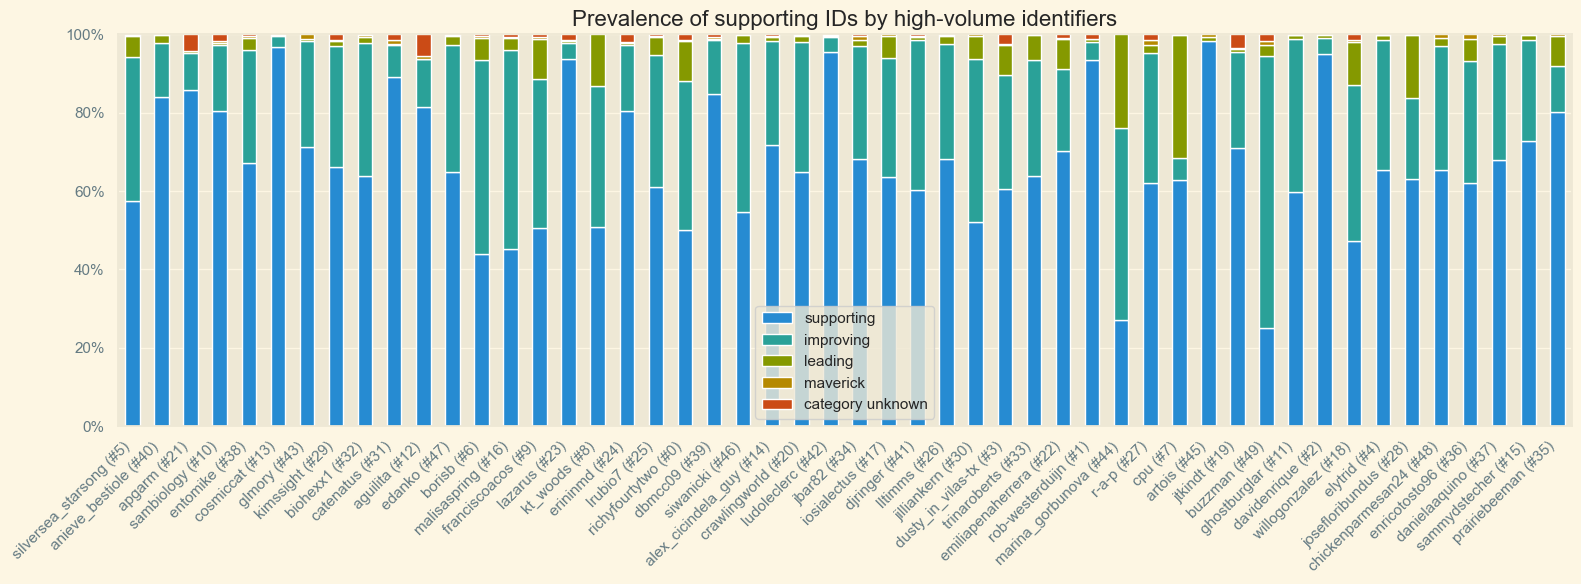

In [333]:
cat_cols = ['supporting', 'improving', 'leading', 'maverick', 'category unknown']
# cats = PROPORTIONS.sort_values('supporting')
cats = PROPORTIONS
ax = cats[cat_cols].plot.bar(stacked=True, figsize=(16,6), title='Prevalence of supporting IDs by high-volume identifiers')
ax.set(xticklabels=cats['username']+' (#'+cats['identifier_rank'].astype(str)+')', ylim=(0,1))
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.figure.tight_layout()
ax.figure.savefig('support2')

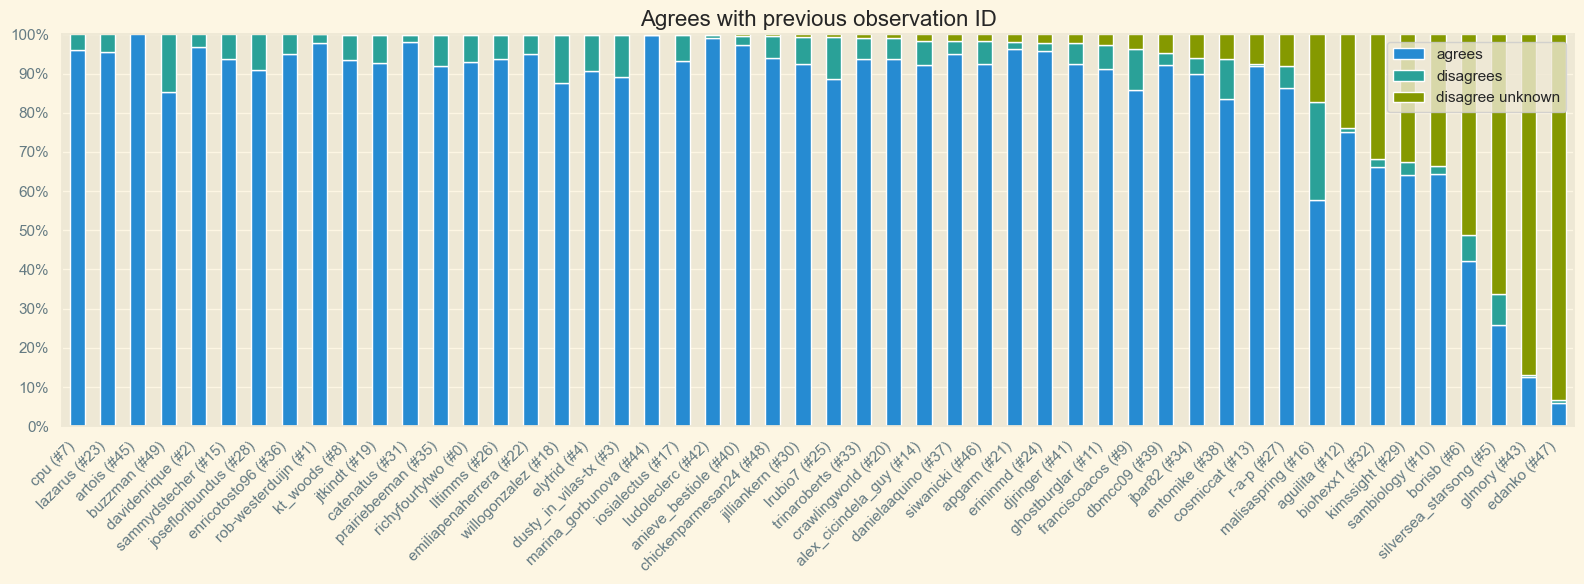

In [252]:
agree_cols = ['agrees', 'disagrees', 'disagree unknown']
agrees = PROPORTIONS.sort_values(['disagree unknown'])
ax = agrees[agree_cols].plot.bar(stacked=True, figsize=(16,6), title='Agrees with previous observation ID')
agree_labels = agrees['username']+' (#'+agrees['identifier_rank'].astype(str)+')'

ax.set(xticklabels=agree_labels, ylim=(0,1), yticks=np.arange(0, 1.1, .1))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.figure.tight_layout()

/var/folders/_x/5fkf1yms3fsdb80jbm4gqr1r0000gq/T/ipykernel_10845/2154605438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TOP_50_USERS['disagreement'] = TOP_50_USERS['disagreement'].astype(str)


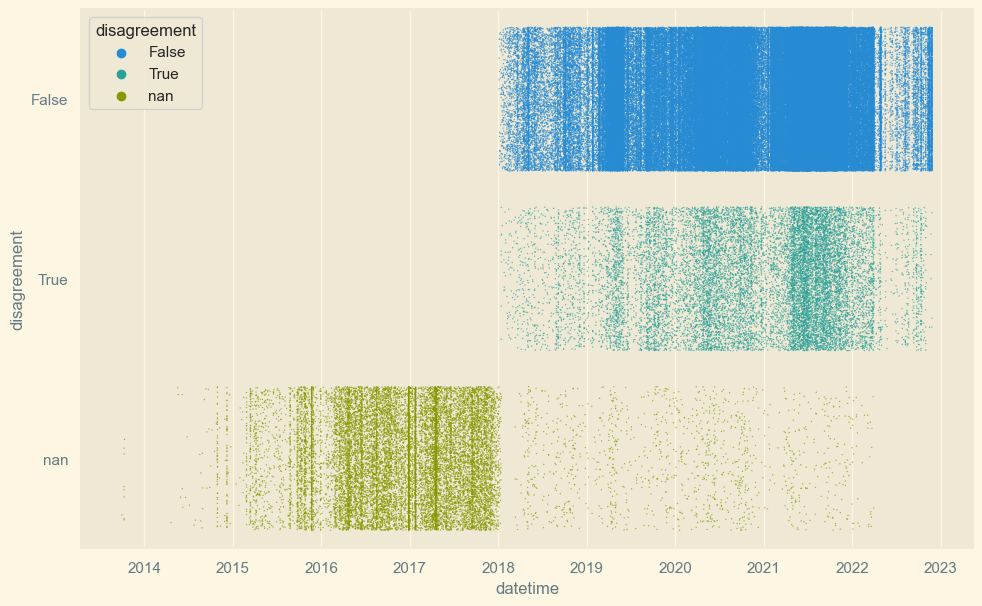

In [157]:
# are those N/As related to date of ID? (i.e. do they predate the categories being introduced)
TOP_50_USERS['disagreement'] = TOP_50_USERS['disagreement'].astype(str)
ax = sns.stripplot(data=TOP_50_USERS, x='datetime', y='disagreement', 
                   jitter=0.4, hue='disagreement', size=1, alpha=0.7)

In [ ]:
# how strongly does 'improving' vs 'leading' correlate with date ID was submitted?

# (ideally: for which species does this *not* hold true? i.e. because few people have the skill to ID them)
TOP_50_USERS['disagreement'] = TOP_50_USERS['disagreement'].astype(str)
ax = sns.stripplot(data=TOP_50_USERS, x='datetime', y='disagreement', 
                   jitter=0.4, hue='disagreement', size=1, alpha=0.7)

In [127]:
TOP_50_USERS[(TOP_50_USERS['disagreement']=='nan') & (TOP_50_USERS['datetime'].dt.year > 2018)]

,observation,identifier,username,datetime,date,time,taxon_id,taxon,rank,rank_level,previous_taxon_id,current,disagreement,category,vision,hidden,identifier_rank
378560,94735608,463097,richyfourtytwo,2021-09-13 18:27:13,2021-09-13,18:27:13,48484,Harmonia axyridis,species,10,NaN,True,nan,improving,False,False,0
391827,98668446,463097,richyfourtytwo,2021-10-19 07:20:44,2021-10-19,07:20:44,207617,Coccinella trifasciata subversa,subspecies,5,207616.0,True,nan,supporting,False,False,0
316528,79057323,463097,richyfourtytwo,2021-05-28 09:36:39,2021-05-28,09:36:39,48486,Coccinellidae,family,30,NaN,True,nan,improving,False,False,0
246589,59233332,463097,richyfourtytwo,2021-12-30 15:10:51,2021-12-30,15:10:51,333796,Coccinellini,tribe,25,NaN,True,nan,leading,False,False,0
251233,60626997,463097,richyfourtytwo,2021-12-31 10:26:49,2021-12-31,10:26:49,333796,Coccinellini,tribe,25,NaN,True,nan,leading,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264116,63657824,2788422,chickenparmesan24,2020-10-27 20:28:42,2020-10-27,20:28:42,333796,Coccinellini,tribe,25,NaN,True,nan,improving,False,False,48
271248,65426316,2788422,chickenparmesan24,2020-11-22 20:12:35,2020-11-22,20:12:35,48484,Harmonia axyridis,species,10,NaN,True,nan,improving,False,False,48
293042,73233475,2788422,chickenparmesan24,2021-04-07 21:28:42,2021-04-07,21:28:42,51702,Coccinella septempunctata,species,10,NaN,True,nan,improving,False,False,48
293029,73230215,2788422,chickenparmesan24,2021-04-07 20:54:37,2021-04-07,20:54:37,51703,Coccinella,genus,20,NaN,True,nan,leading,False,False,48


In [234]:
(cats['improving']+cats['leading'])

2000059    0.723320
1453678    0.729148
180811     0.551615
242224     0.539899
2207499    0.508141
463097     0.482822
261069     0.483205
297834     0.490756
980404     0.475259
548881     0.451791
6971       0.420379
2032840    0.399800
792319     0.391085
1012326    0.368352
382941     0.383721
3380195    0.368780
1454648    0.351861
1485790    0.371297
2343836    0.366945
775455     0.359938
81261      0.356448
1163777    0.360133
706076     0.348203
165078     0.348162
2249019    0.345000
2788422    0.336283
80984      0.320519
23520      0.318318
3499188    0.315356
794489     0.313985
736966     0.302105
1397024    0.284389
1809393    0.253241
52839      0.275174
579740     0.274712
3720783    0.269582
4034966    0.194602
331926     0.174079
22589      0.173949
115129     0.123596
16700      0.157765
479031     0.141494
18701      0.098714
85164      0.086294
1442162    0.052511
270883     0.045455
2116455    0.048632
736005     0.041952
34728      0.029468
1598908    0.009883


In [236]:
cats

,username,identifier_rank,num_IDs,leading,improving,supporting,maverick,category unknown,family,subfamily,tribe,genus,species,subspecies,complex,form,agrees,disagrees,disagree unknown
2000059,buzzman,49,1012,0.027668,0.695652,0.250000,0.008893,0.017787,0.030632,0.018775,0.006917,0.057312,0.882411,0.003953,0.000000,0.000000,0.853755,0.146245,0.000000
1453678,marina_gorbunova,44,1115,0.239462,0.489686,0.270852,0.000000,0.000000,0.748879,0.085202,0.011659,0.007175,0.147085,0.000000,0.000000,0.000000,0.997309,0.000897,0.001794
180811,borisb,6,8854,0.055003,0.496612,0.439349,0.006212,0.002824,0.063361,0.025412,0.046646,0.100407,0.761464,0.002598,0.000000,0.000113,0.422860,0.064039,0.513101
242224,malisaspring,16,3960,0.031818,0.508081,0.451515,0.002020,0.006566,0.174495,0.010606,0.012374,0.045455,0.755808,0.001263,0.000000,0.000000,0.576768,0.250505,0.172727
2207499,willogonzalez,18,3255,0.108449,0.399693,0.471889,0.006759,0.013210,0.013518,0.007988,0.043318,0.133641,0.793241,0.008295,0.000000,0.000000,0.876805,0.121966,0.001229
463097,richyfourtytwo,0,65724,0.102307,0.380515,0.501019,0.000852,0.015306,0.008231,0.000563,0.091671,0.047045,0.852170,0.000320,0.000000,0.000000,0.930589,0.068636,0.000776
261069,franciscoacos,9,6252,0.101727,0.381478,0.505758,0.004958,0.006078,0.058701,0.047185,0.027351,0.164107,0.701855,0.000800,0.000000,0.000000,0.857646,0.106366,0.035988
297834,kt_woods,8,6653,0.132722,0.358034,0.509244,0.000000,0.000000,0.006313,0.001353,0.020292,0.058019,0.900797,0.013227,0.000000,0.000000,0.934315,0.065384,0.000301
980404,jilliankern,30,1738,0.059264,0.415995,0.520138,0.004603,0.000000,0.027043,0.005178,0.001151,0.056962,0.895857,0.013234,0.000000,0.000575,0.925201,0.068470,0.006329
548881,siwanicki,46,1089,0.019284,0.432507,0.546373,0.001837,0.000000,0.007346,0.000000,0.001837,0.030303,0.960514,0.000000,0.000000,0.000000,0.923783,0.059688,0.016529


<AxesSubplot: title={'center': 'Improving + leading IDs by top 50 identifiers'}, xlabel='identifier_rank'>

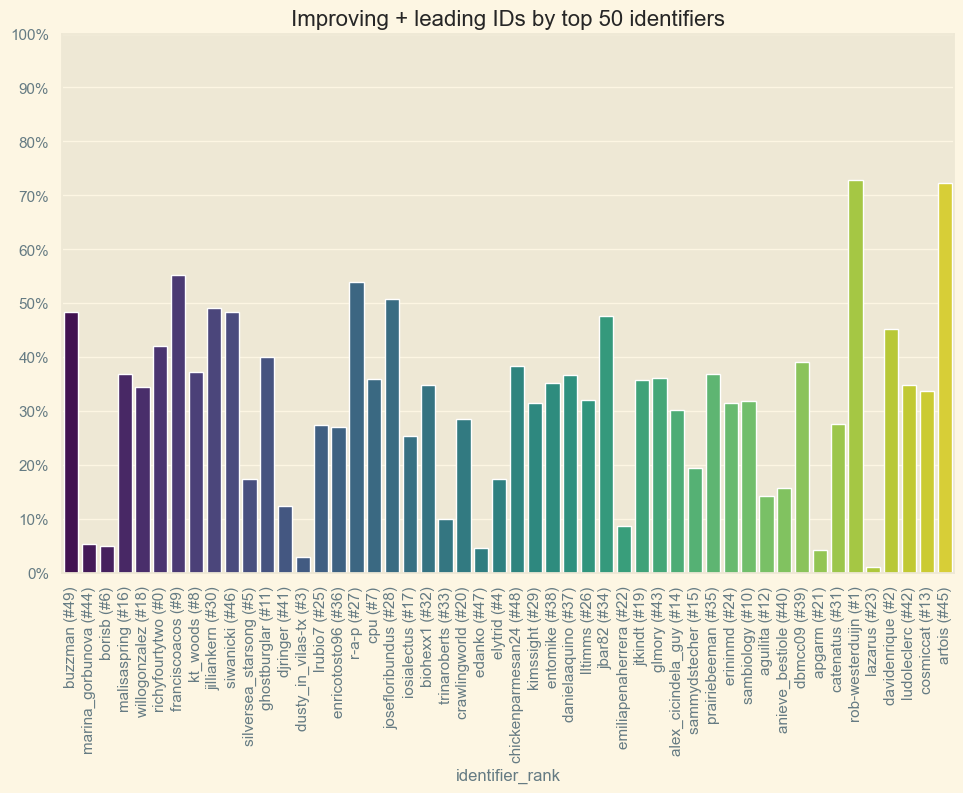

In [233]:
sns.set(rc={'figure.figsize':(11.5,7)})
plt.style.use('Solarize_Light2')

ax = sns.barplot(x=cats['identifier_rank'], y=cats['improving']+cats['leading'], palette=sns.color_palette('viridis', 50))
ax.set(ylim=(0,1.0), yticks=np.arange(0, 1.1, .1), title='Improving + leading IDs by top 50 identifiers')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.set(xticklabels=cats['username']+' (#'+cats['identifier_rank'].astype(str)+')', ylim=(0,1))
plt.setp(ax.get_xticklabels(), rotation=90)
ax

In [162]:
TOP_50_USERS.loc[TOP_50_USERS['rank'] == 'species', 'taxon'].value_counts()

Harmonia axyridis            134846
Coccinella septempunctata     40002
Hippodamia convergens         21729
Cycloneda sanguinea           10112
Coleomegilla maculata          6736
                              ...  
Mulsantina quinquelineata         1
Novius sieboldii                  1
Halyzia sedecimguttata            1
Epilachna marginella              1
Coleomegilla innotata             1
Name: taxon, Length: 496, dtype: int64

In [189]:
# how many different species does each user do?

TOP_50_USERS[TOP_50_USERS['rank'] == 'species'].groupby(['username', 'taxon']).count()['taxon']

# pd.DataFrame(TOP_50_USERS[TOP_50_USERS['rank'] == 'species'].groupby(['username', 'taxon']).count()['observation']).sort_values(by='observation', ascending=False)

KeyError: 'taxon'

In [220]:
USER_TOTALS

,username,total,frac_species,species,frac_genus,genus,frac_tribe,tribe,frac_subfamily,subfamily,frac_family,family
identifier,,,,,,,,,,,,
463097,richyfourtytwo,65109,0.858990,55928,0.045600,2969,0.087914,5724,0.000415,27,0.007080,461
1442162,rob-westerduijn,37487,0.996932,37372,0.001334,50,0.000080,3,0.001147,43,0.000507,19
2116455,davidenrique,19244,0.990802,19067,0.005560,107,0.000104,2,0.000156,3,0.003378,65
1012326,dusty_in_vilas-tx,14508,0.966157,14017,0.023642,343,0.003377,49,0.004825,70,0.001999,29
2249019,elytrid,12954,0.964181,12490,0.006330,82,0.017910,232,0.002393,31,0.009186,119
...,...,...,...,...,...,...,...,...,...,...,...,...
111602,laurenis4animals,1,1.000000,1,0.000000,0,0.000000,0,0.000000,0,0.000000,0
1685053,pixie2sneakers,1,1.000000,1,0.000000,0,0.000000,0,0.000000,0,0.000000,0
24133,carrielynn,1,0.000000,0,1.000000,1,0.000000,0,0.000000,0,0.000000,0


In [221]:
cats

,username,identifier_rank,num_IDs,leading,improving,supporting,maverick,category unknown,family,subfamily,tribe,genus,species,subspecies,complex,form,agrees,disagrees,disagree unknown
2000059,buzzman,49,1012,0.027668,0.695652,0.250000,0.008893,0.017787,0.030632,0.018775,0.006917,0.057312,0.882411,0.003953,0.000000,0.000000,0.853755,0.146245,0.000000
1453678,marina_gorbunova,44,1115,0.239462,0.489686,0.270852,0.000000,0.000000,0.748879,0.085202,0.011659,0.007175,0.147085,0.000000,0.000000,0.000000,0.997309,0.000897,0.001794
180811,borisb,6,8854,0.055003,0.496612,0.439349,0.006212,0.002824,0.063361,0.025412,0.046646,0.100407,0.761464,0.002598,0.000000,0.000113,0.422860,0.064039,0.513101
242224,malisaspring,16,3960,0.031818,0.508081,0.451515,0.002020,0.006566,0.174495,0.010606,0.012374,0.045455,0.755808,0.001263,0.000000,0.000000,0.576768,0.250505,0.172727
2207499,willogonzalez,18,3255,0.108449,0.399693,0.471889,0.006759,0.013210,0.013518,0.007988,0.043318,0.133641,0.793241,0.008295,0.000000,0.000000,0.876805,0.121966,0.001229
463097,richyfourtytwo,0,65724,0.102307,0.380515,0.501019,0.000852,0.015306,0.008231,0.000563,0.091671,0.047045,0.852170,0.000320,0.000000,0.000000,0.930589,0.068636,0.000776
261069,franciscoacos,9,6252,0.101727,0.381478,0.505758,0.004958,0.006078,0.058701,0.047185,0.027351,0.164107,0.701855,0.000800,0.000000,0.000000,0.857646,0.106366,0.035988
297834,kt_woods,8,6653,0.132722,0.358034,0.509244,0.000000,0.000000,0.006313,0.001353,0.020292,0.058019,0.900797,0.013227,0.000000,0.000000,0.934315,0.065384,0.000301
980404,jilliankern,30,1738,0.059264,0.415995,0.520138,0.004603,0.000000,0.027043,0.005178,0.001151,0.056962,0.895857,0.013234,0.000000,0.000575,0.925201,0.068470,0.006329
548881,siwanicki,46,1089,0.019284,0.432507,0.546373,0.001837,0.000000,0.007346,0.000000,0.001837,0.030303,0.960514,0.000000,0.000000,0.000000,0.923783,0.059688,0.016529


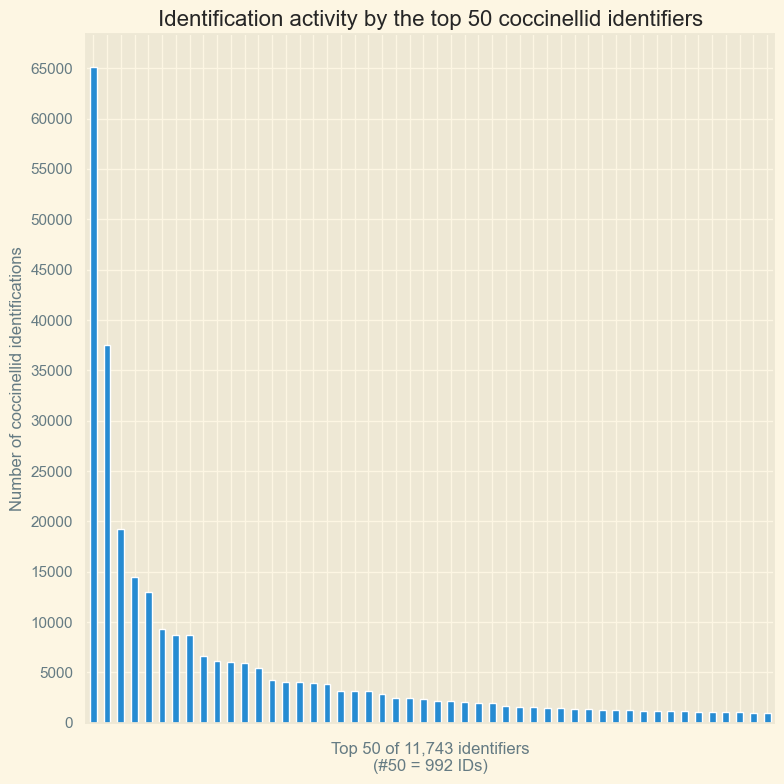

In [362]:
ax = USER_TOTALS.set_index('username').iloc[:50]['total'].plot.bar(x='username', legend=False, xlabel=f"Top 50 of 11,743 identifiers\n(#50 = {USER_TOTALS['total'].iloc[49]} IDs)", ylabel='Number of coccinellid identifications', figsize=(8,8))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.set(yticks=np.arange(0,70000,5000), title='Identification activity by the top 50 coccinellid identifiers')
ax.figure.tight_layout()
ax.figure.savefig('powerlaw')